<a href="https://colab.research.google.com/github/Rathamsettygovardhan/Digitrecog/blob/master/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv('/content/drive/MyDrive/mnist_train.csv')
df

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,3,18,18.1,18.2,126,136,175,26,166,255,247,127,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,30,36,94,154,170,253,253.1,253.2,253.3,253.4,225,172,253.5,242,195,64,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,49,238,253.6,253.7,253.8,253.9,253.10,253.11,253.12,253.13,251,93,82,82.1,56,39,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,18.3,219,253.14,253.15,253.16,253.17,253.18,198,182,247.1,241,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,80,156,107,253.19,253.20,205,11,0.205,43,154.1,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,0.224,14,1,154.2,253.21,90,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,139,253.22,190,2,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,11.1,190.1,253.23,70,0.274,0.275,0.276,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,35,241.1,225.1,160,108,1.1,0.299,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,81,240,253.24,253.25,119,25,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,45,186,253.26,253.27,150,27,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,16,93.1,252,253.28,187,0.368,0.369,0.370,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,249,253.29,249.1,64.1,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,46,130,183,253.30,253.31,207,2.1,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.430,0.431,0.432,39.1,148,229,253.32,253.33,253.34,250,182.1,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,24,114,221,253.35,253.36,253.37,253.38,201,78,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,23,66,213,253.39,253.40,253.41,253.42,198.1,81.1,2.2,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481,0.482,0.483,18.4,171,219.1,253.43,253.44,253.45,253.46,195.1,80.1,9,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,55,172.1,226,253.47,253.48,253.49,253.50,244,133,11.2,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,136.1,253.51,253.52,253.53,212,135,132,16.1,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548

In [4]:
df.rename(columns={'5':'Label'}, inplace=True)

In [6]:
viz1=df.iloc[2,1:].values.reshape(-1,1).reshape((28,28))
viz1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

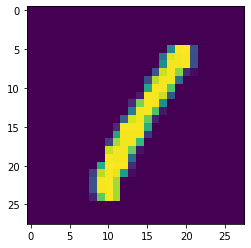

In [7]:
plt.plot(figsize=(1.5,1.5))
plt.imshow(viz1)
plt.show()

In [13]:
x=df.drop('Label', axis=1)
y=df['Label']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pre

array([1, 2, 7, ..., 4, 2, 1])

In [27]:
(y_test==pre).value_counts()      # There are 116627 correctly predicted and 373 incorrect

True     11627
False      373
Name: Label, dtype: int64

In [23]:
11627/12000*100     #Which means this is the correctly predicted percentage

96.89166666666667

In [30]:
knn.score(x_test, y_test)*100   #Crosschecking the above calc with score metric

96.89166666666667

In [ ]:
#Fetching and printing the first 15 original labels vs predicted 15 labels.

In [76]:
s=[]
for i in range(0,16):
  s.append(x_test.iloc[i].values.reshape(-1,1).reshape(28,28))

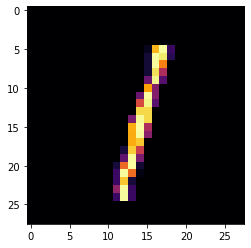

Predicted Number is:  1






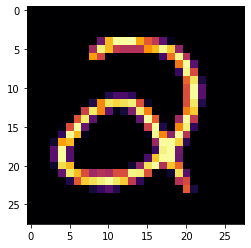

Predicted Number is:  2






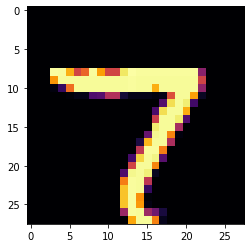

Predicted Number is:  7






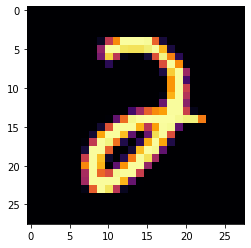

Predicted Number is:  2






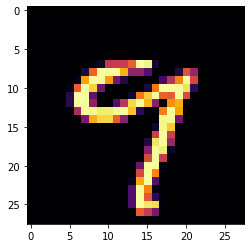

Predicted Number is:  9






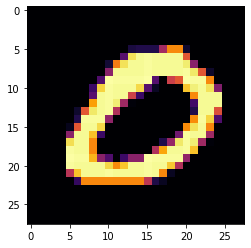

Predicted Number is:  0






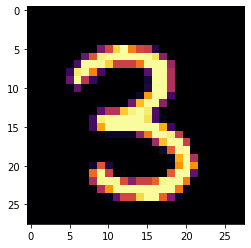

Predicted Number is:  3






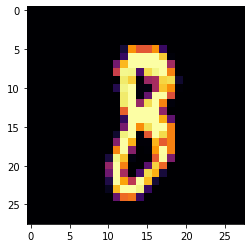

Predicted Number is:  8






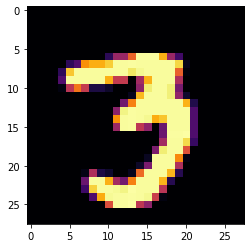

Predicted Number is:  3






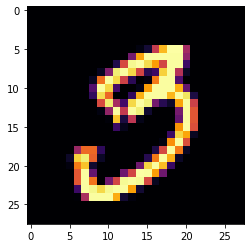

Predicted Number is:  3






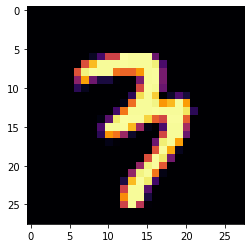

Predicted Number is:  3






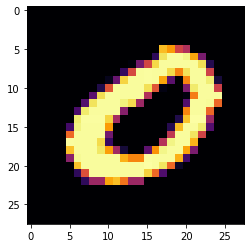

Predicted Number is:  0






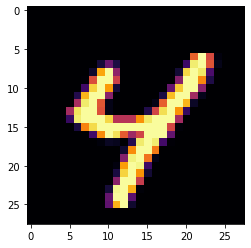

Predicted Number is:  4






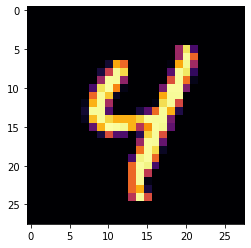

Predicted Number is:  4






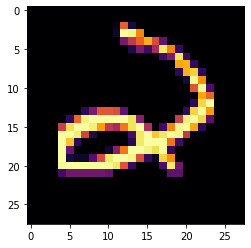

Predicted Number is:  2






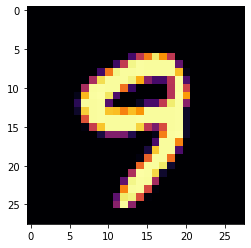

Predicted Number is:  9






In [130]:
j=0
for i in s:
  plt.plot(figsize=(1,1), dpi=300)
  plt.imshow(i, cmap='inferno')
  plt.show()
  print('Predicted Number is: ', pre[j])
  print('\n')
  print('\n')
  j+=1